In [34]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
from collections import Counter
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Evaluation of secondary experiments regarding model settings

## S1 B1.0 - Iterations 1 - Temperature 0.6

In [35]:
#B1.0
path_S1 = 'STRING_RESULT/B1.0/all_iterations_T0.6I1'

# Open all dataframes
S1 = pd.read_csv(f'{path_S1}/all_iterations_string_T0.6_3644.csv')
S2 = pd.read_csv(f'{path_S1}/all_iterations_string_T0.6_3441.csv')
S3 = pd.read_csv(f'{path_S1}/all_iterations_string_T0.6_280.csv')
S4 = pd.read_csv(f'{path_S1}/all_iterations_string_T0.6_5991.csv')
S5 = pd.read_csv(f'{path_S1}/all_iterations_string_T0.6_7917.csv')


In [36]:
# Combine all dataframes into one
BS1_full = pd.concat([S1, S2, S3, S4, S5], ignore_index=True)

In [37]:
# Filter rows to keep only those where the unique_id appears exactly 5 times
filtered_S1 = BS1_full.groupby('unique_id').filter(lambda x: len(x) == 5)
filtered_S1.shape

(4760, 6)

(4760, 6)

In [38]:
# List of unique_id's that are annotated 5 times
unique_ids = filtered_S1['unique_id'].unique().tolist()

In [39]:
# Filter all original dataframes to only include sentences that are annotated 5x by other seeds
FS1S1 = S1[S1['unique_id'].isin(unique_ids)]
FS1S2 = S2[S2['unique_id'].isin(unique_ids)]
FS1S3 = S3[S3['unique_id'].isin(unique_ids)]
FS1S4 = S4[S4['unique_id'].isin(unique_ids)]
FS1S5 = S5[S5['unique_id'].isin(unique_ids)]

In [40]:
# Evaluate performance of individual seeds for the same sentences
# Function to generate classification report for each dataframe
def generate_classification_report(df, true_label_col, pred_label_col):
    return classification_report(df[true_label_col], df[pred_label_col], output_dict=True)

# Generate classification reports
report_S1 = generate_classification_report(FS1S1, 'RELEVANCE_x', 'RELEVANCE_y')
report_S2 = generate_classification_report(FS1S2, 'RELEVANCE_x', 'RELEVANCE_y')
report_S3 = generate_classification_report(FS1S3, 'RELEVANCE_x', 'RELEVANCE_y')
report_S4 = generate_classification_report(FS1S4, 'RELEVANCE_x', 'RELEVANCE_y')
report_S5 = generate_classification_report(FS1S5, 'RELEVANCE_x', 'RELEVANCE_y')

# Function to print the classification reports for easy comparison
def print_classification_report(report, title):
    print(f"Classification Report for {title}")
    print(pd.DataFrame(report).transpose())
    print("\n")

# Print the classification reports
print_classification_report(report_S1, "S1")
print_classification_report(report_S2, "S2")
print_classification_report(report_S3, "S3")
print_classification_report(report_S4, "S4")
print_classification_report(report_S5, "S5")

Classification Report for S1
                     precision    recall  f1-score     support
Not relevant          0.958791  0.559295  0.706478  624.000000
Relevant              0.358354  0.850575  0.504259  174.000000
Statement of intent   0.440000  0.500000  0.468085  154.000000
accuracy              0.602941  0.602941  0.602941    0.602941
macro avg             0.585715  0.636623  0.559607  952.000000
weighted avg          0.765125  0.602941  0.630954  952.000000


Classification Report for S2
                     precision    recall  f1-score     support
Not relevant          0.947368  0.548077  0.694416  624.000000
Relevant              0.344140  0.793103  0.480000  174.000000
Statement of intent   0.442105  0.545455  0.488372  154.000000
accuracy              0.592437  0.592437  0.592437    0.592437
macro avg             0.577871  0.628878  0.554263  952.000000
weighted avg          0.755381  0.592437  0.621896  952.000000


Classification Report for S3
                     precis

Evaluate consistency of predictions over the 5 different instances - see which sentences are not consistantly predicted.


In [41]:
# I want to evaluate consistency
# Print all rows where inconsequences are found per seed
def relevance_y_not_uniform(group):
    return group['RELEVANCE_y'].nunique() != 1


# Group by 'ID' and filter groups
BS1_consistency = filtered_S1.groupby('unique_id').filter(relevance_y_not_uniform)

BS1_consistency.shape

(1475, 6)

(1475, 6)


In combined dataframe, groupyby unique ID and take the majority label

In [42]:
# Define a function to get the most frequent element
def most_frequent(x):
    return Counter(x).most_common(1)[0][0]

# List of all columns
all_columns = filtered_S1.columns.tolist()

# Dictionary to specify aggregation functions
agg_dict = {col: 'first' for col in all_columns if col not in ['unique_id', 'RELEVANCE_y']}
agg_dict['RELEVANCE_y'] = most_frequent

# Group by 'unique_id' and apply the aggregation functions
filtered_S1_grouped = filtered_S1.groupby('unique_id').agg(agg_dict).reset_index()

filtered_S1_grouped

,unique_id,text,RELEVANCE_x,llm_query,iteration,RELEVANCE_y
0,20,Japan will establish a low carbon society thr...,Statement of intent,20 Japan will establish a low carbon society ...,1,Statement of intent
1,21,We will strategically promote mitigation meas...,Statement of intent,21 We will strategically promote mitigation m...,1,Statement of intent
2,22,We will enhance development and demonstration...,Statement of intent,22 We will enhance development and demonstrat...,1,Statement of intent
3,23,Japan is hosting the IPCC session next March.,Not relevant,23 Japan is hosting the IPCC session next Mar...,1,Not relevant
4,24,"Using that opportunity, we will launch a new ...",Statement of intent,"24 Using that opportunity, we will launch a n...",1,Statement of intent
...,...,...,...,...,...,...
947,1207,New Zealand is proud to suppor t several impo...,Not relevant,1207 New Zealand is proud to suppor t several...,1,Not relevant
948,1208,"I am joined by New Zealand’s largest business,...",Not relevant,1208 I am joined by New Zealand’s largest busi...,1,Not relevant
949,1209,The commitment o f New Zealanders from across ...,Not relevant,1209 The commitment o f New Zealanders from ac...,1,Not relevant
950,1210,Thank you Mr President.,Not relevant,1210 Thank you Mr President.\n,1,Not relevant


,unique_id,text,RELEVANCE_x,llm_query,iteration,RELEVANCE_y
0,20,Japan will establish a low carbon society thr...,Statement of intent,20 Japan will establish a low carbon society ...,1,Statement of intent
1,21,We will strategically promote mitigation meas...,Statement of intent,21 We will strategically promote mitigation m...,1,Statement of intent
2,22,We will enhance development and demonstration...,Statement of intent,22 We will enhance development and demonstrat...,1,Statement of intent
3,23,Japan is hosting the IPCC session next March.,Not relevant,23 Japan is hosting the IPCC session next Mar...,1,Not relevant
4,24,"Using that opportunity, we will launch a new ...",Statement of intent,"24 Using that opportunity, we will launch a n...",1,Statement of intent
...,...,...,...,...,...,...
947,1207,New Zealand is proud to suppor t several impo...,Not relevant,1207 New Zealand is proud to suppor t several...,1,Not relevant
948,1208,"I am joined by New Zealand’s largest business,...",Not relevant,1208 I am joined by New Zealand’s largest busi...,1,Not relevant
949,1209,The commitment o f New Zealanders from across ...,Not relevant,1209 The commitment o f New Zealanders from ac...,1,Not relevant
950,1210,Thank you Mr President.,Not relevant,1210 Thank you Mr President.\n,1,Not relevant


In [43]:
# Evaluate performance of this dataframe
print(classification_report(filtered_S1_grouped['RELEVANCE_x'],filtered_S1_grouped['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.95      0.55      0.69       624
           Relevant       0.35      0.80      0.48       174
Statement of intent       0.42      0.51      0.46       154

           accuracy                           0.59       952
          macro avg       0.57      0.62      0.55       952
       weighted avg       0.75      0.59      0.62       952

                     precision    recall  f1-score   support

       Not relevant       0.95      0.55      0.69       624
           Relevant       0.35      0.80      0.48       174
Statement of intent       0.42      0.51      0.46       154

           accuracy                           0.59       952
          macro avg       0.57      0.62      0.55       952
       weighted avg       0.75      0.59      0.62       952



(array([0, 1, 2]),
 [Text(0, 0, 'not relevant'),
  Text(1, 0, 'statement of intent'),
  Text(2, 0, 'relevant')])

<Figure size 8000x8000 with 0 Axes>

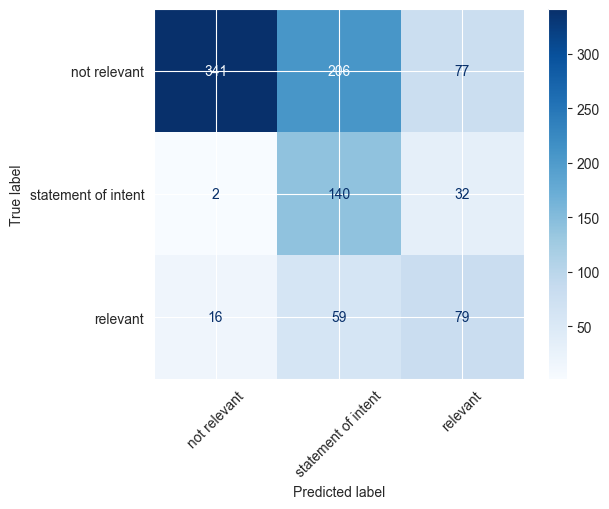

(array([0, 1, 2]),
 [Text(0, 0, 'not relevant'),
  Text(1, 0, 'statement of intent'),
  Text(2, 0, 'relevant')])

<Figure size 8000x8000 with 0 Axes>

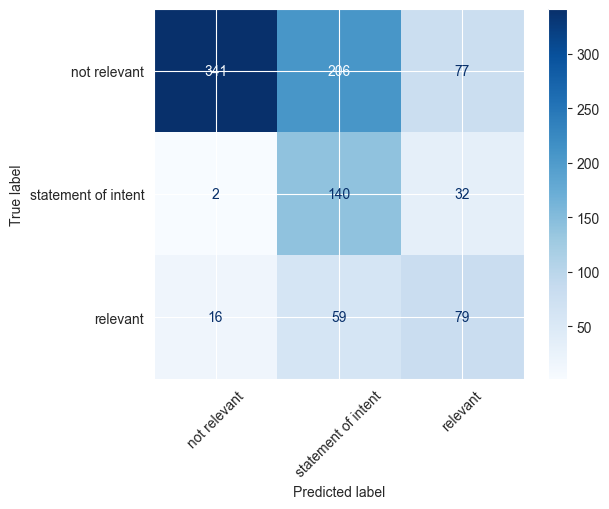

In [44]:
# Evaluate confusionmatrix for this aggregated set
labels = ['not relevant', 'statement of intent', 'relevant']

plt.figure(figsize=(80, 80))
cm = confusion_matrix(filtered_S1_grouped['RELEVANCE_x'],filtered_S1_grouped['RELEVANCE_y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

# Rotate x-axis and y-axis tick labels
plt.xticks(rotation=45)

____________________________________________________________________________________

## S2 B1.0 - Iterations 3 - Temperature 0

In [45]:
#B1.0
path_S2 = 'STRING_RESULT/B1.0/all_iterations_T0I3'

# Open all dataframes
S1 = pd.read_csv(f'{path_S2}/all_iterations_string_T0_3644.csv')
S2 = pd.read_csv(f'{path_S2}/all_iterations_string_T0_3441.csv')
S3 = pd.read_csv(f'{path_S2}/all_iterations_string_T0_280.csv')
S4 = pd.read_csv(f'{path_S2}/all_iterations_string_T0_5991.csv')
S5 = pd.read_csv(f'{path_S2}/all_iterations_string_T0_7917.csv')


Filter all evaluations for the sentences that are evaluated for all iterations. Check the consistency of these evaluations


In [46]:
# I want to evaluate consistency
# Print all rows where inconsequences are found per seed
def relevance_y_not_uniform(group):
    return group['RELEVANCE_y'].nunique() != 1


In [47]:
# Filter rows to keep only those where the unique_id appears exactly 3 times
filtered_S1 = S1.groupby('unique_id').filter(lambda x: len(x) == 3)
print('rows with 3 iterations', filtered_S1.shape)
print('original',S1.shape)
S1_consistency = filtered_S1.groupby('unique_id').filter(relevance_y_not_uniform)
print('Inconsistency in 3 iterations', S1_consistency.shape)

rows with 3 iterations (3180, 6)
original (3464, 6)
Inconsistency in 3 iterations (324, 6)
rows with 3 iterations (3180, 6)
original (3464, 6)
Inconsistency in 3 iterations (324, 6)


In [48]:
# Filter rows to keep only those where the unique_id appears exactly 3 times
filtered_S2 = S2.groupby('unique_id').filter(lambda x: len(x) == 3)
print('rows with 3 iterations', filtered_S2.shape)
print('original',S2.shape)
S2_consistency = filtered_S2.groupby('unique_id').filter(relevance_y_not_uniform)
print('Inconsistency in 3 iterations', S2_consistency.shape)

rows with 3 iterations (3336, 6)
original (3516, 6)
Inconsistency in 3 iterations (315, 6)
rows with 3 iterations (3336, 6)
original (3516, 6)
Inconsistency in 3 iterations (315, 6)


In [49]:
# Filter rows to keep only those where the unique_id appears exactly 3 times
filtered_S3 = S3.groupby('unique_id').filter(lambda x: len(x) == 3)
print('rows with 3 iterations', filtered_S3.shape)
print('original',S3.shape)
S3_consistency = filtered_S3.groupby('unique_id').filter(relevance_y_not_uniform)
print('Inconsistency in 3 iterations', S3_consistency.shape)

rows with 3 iterations (3060, 6)
original (3432, 6)
Inconsistency in 3 iterations (285, 6)
rows with 3 iterations (3060, 6)
original (3432, 6)
Inconsistency in 3 iterations (285, 6)


In [50]:
# Filter rows to keep only those where the unique_id appears exactly 3 times
filtered_S4 = S4.groupby('unique_id').filter(lambda x: len(x) == 3)
print('rows with 3 iterations', filtered_S4.shape)
print('original',S4.shape)
S4_consistency = filtered_S4.groupby('unique_id').filter(relevance_y_not_uniform)
print('Inconsistency in 3 iterations', S4_consistency.shape)

rows with 3 iterations (2976, 6)
original (3376, 6)
Inconsistency in 3 iterations (198, 6)
rows with 3 iterations (2976, 6)
original (3376, 6)
Inconsistency in 3 iterations (198, 6)


In [51]:
# Filter rows to keep only those where the unique_id appears exactly 3 times
filtered_S5 = S5.groupby('unique_id').filter(lambda x: len(x) == 3)
print('rows with 3 iterations', filtered_S5.shape)
print('original',S5.shape)
S5_consistency = filtered_S5.groupby('unique_id').filter(relevance_y_not_uniform)
print('Inconsistency in 3 iterations', S5_consistency.shape)

rows with 3 iterations (3276, 6)
original (3516, 6)
Inconsistency in 3 iterations (315, 6)
rows with 3 iterations (3276, 6)
original (3516, 6)
Inconsistency in 3 iterations (315, 6)


In [52]:
filtered_S5.head()

,unique_id,text,RELEVANCE_x,llm_query,RELEVANCE_y,iteration
0,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",Not relevant,1
1,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",Not relevant,2
2,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",Not relevant,3
3,1,"On beha lf of the government of Japan , I wou...",Not relevant,"1 On beha lf of the government of Japan , I w...",Not relevant,1
4,1,"On beha lf of the government of Japan , I wou...",Not relevant,"1 On beha lf of the government of Japan , I w...",Not relevant,2


,unique_id,text,RELEVANCE_x,llm_query,RELEVANCE_y,iteration
0,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",Not relevant,1
1,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",Not relevant,2
2,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",Not relevant,3
3,1,"On beha lf of the government of Japan , I wou...",Not relevant,"1 On beha lf of the government of Japan , I w...",Not relevant,1
4,1,"On beha lf of the government of Japan , I wou...",Not relevant,"1 On beha lf of the government of Japan , I w...",Not relevant,2


In [53]:
## Combine all filtered dataframes - contain only sentences that are annotated 3 times
S2_full = pd.concat([filtered_S1,filtered_S2,filtered_S3, filtered_S4, filtered_S5], ignore_index=True)

# Filter to keep only rows where unique ID appears 15 times - thus evaluated for all seeds
filtered_S2 = S2_full.groupby('unique_id').filter(lambda x: len(x) == 15)


In combined dataframe, groupyby unique ID and take the majority label

In [54]:
# Define a function to get the most frequent element
def most_frequent(x):
    return Counter(x).most_common(1)[0][0]

# List of all columns
all_columns = filtered_S2.columns.tolist()

# Dictionary to specify aggregation functions
agg_dict = {col: 'first' for col in all_columns if col not in ['unique_id', 'RELEVANCE_y']}
agg_dict['RELEVANCE_y'] = most_frequent

# Group by 'unique_id' and apply the aggregation functions
filtered_S2_grouped = filtered_S2.groupby('unique_id').agg(agg_dict).reset_index()
filtered_S2_grouped

,unique_id,text,RELEVANCE_x,llm_query,iteration,RELEVANCE_y
0,20,Japan will establish a low carbon society thr...,Statement of intent,20 Japan will establish a low carbon society ...,1,Statement of intent
1,21,We will strategically promote mitigation meas...,Statement of intent,21 We will strategically promote mitigation m...,1,Statement of intent
2,22,We will enhance development and demonstration...,Statement of intent,22 We will enhance development and demonstrat...,1,Statement of intent
3,23,Japan is hosting the IPCC session next March.,Not relevant,23 Japan is hosting the IPCC session next Mar...,1,Not relevant
4,24,"Using that opportunity, we will launch a new ...",Statement of intent,"24 Using that opportunity, we will launch a n...",1,Statement of intent
...,...,...,...,...,...,...
615,1155,This global initiative prioritises climate -re...,Not relevant,1155 This global initiative prioritises climat...,1,Statement of intent
616,1156,We are grateful for the 58 countries that have...,Not relevant,1156 We are grateful for the 58 countries that...,1,Not relevant
617,1157,But much more needs to be done.,Statement of intent,1157 But much more needs to be done.\n,1,Statement of intent
618,1158,"My friends, Jordan contributes a slim 0.06 p...",Not relevant,"1158 My friends, Jordan contributes a slim 0...",1,Relevant


,unique_id,text,RELEVANCE_x,llm_query,iteration,RELEVANCE_y
0,20,Japan will establish a low carbon society thr...,Statement of intent,20 Japan will establish a low carbon society ...,1,Statement of intent
1,21,We will strategically promote mitigation meas...,Statement of intent,21 We will strategically promote mitigation m...,1,Statement of intent
2,22,We will enhance development and demonstration...,Statement of intent,22 We will enhance development and demonstrat...,1,Statement of intent
3,23,Japan is hosting the IPCC session next March.,Not relevant,23 Japan is hosting the IPCC session next Mar...,1,Not relevant
4,24,"Using that opportunity, we will launch a new ...",Statement of intent,"24 Using that opportunity, we will launch a n...",1,Statement of intent
...,...,...,...,...,...,...
615,1155,This global initiative prioritises climate -re...,Not relevant,1155 This global initiative prioritises climat...,1,Statement of intent
616,1156,We are grateful for the 58 countries that have...,Not relevant,1156 We are grateful for the 58 countries that...,1,Not relevant
617,1157,But much more needs to be done.,Statement of intent,1157 But much more needs to be done.\n,1,Statement of intent
618,1158,"My friends, Jordan contributes a slim 0.06 p...",Not relevant,"1158 My friends, Jordan contributes a slim 0...",1,Relevant


In [55]:
# Evaluate performance of this dataframe
print(classification_report(filtered_S2_grouped['RELEVANCE_x'],filtered_S2_grouped['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.91      0.54      0.68       384
           Relevant       0.35      0.80      0.49       112
Statement of intent       0.52      0.57      0.55       124

           accuracy                           0.60       620
          macro avg       0.60      0.64      0.57       620
       weighted avg       0.73      0.60      0.62       620

                     precision    recall  f1-score   support

       Not relevant       0.91      0.54      0.68       384
           Relevant       0.35      0.80      0.49       112
Statement of intent       0.52      0.57      0.55       124

           accuracy                           0.60       620
          macro avg       0.60      0.64      0.57       620
       weighted avg       0.73      0.60      0.62       620



_____________________________________________________

## S3 B1.0 - Iterations 3 - Temperature 0.6

In [56]:
#B1.0
path_S3 = 'STRING_RESULT/B1.0/all_iterations_0.6I3'

# Open all dataframes
S1 = pd.read_csv(f'{path_S3}/all_iterations_string_T0.6_3644.csv')
S2 = pd.read_csv(f'{path_S3}/all_iterations_string_T0.6_3441.csv')
S3 = pd.read_csv(f'{path_S3}/all_iterations_string_T0.6_280.csv')
S4 = pd.read_csv(f'{path_S3}/all_iterations_string_T0.6_5991.csv')
S5 = pd.read_csv(f'{path_S3}/all_iterations_string_T0.6_7917.csv')


Filter all evaluations for the sentences that are evaluated for all iterations. Check the consistency of these evaluations


In [57]:
# I want to evaluate consistency
# Print all rows where inconsequences are found per seed
def relevance_y_not_uniform(group):
    return group['RELEVANCE_y'].nunique() != 1


In [58]:
# Filter rows to keep only those where the unique_id appears exactly 3 times
filtered_S1 = S1.groupby('unique_id').filter(lambda x: len(x) == 3)
print('rows with 3 iterations', filtered_S1.shape)
print('original',S1.shape)
S1_consistency = filtered_S1.groupby('unique_id').filter(relevance_y_not_uniform)
print('Inconsistency in 3 iterations', S1_consistency.shape)

rows with 3 iterations (3396, 6)
original (3556, 6)
Inconsistency in 3 iterations (417, 6)
rows with 3 iterations (3396, 6)
original (3556, 6)
Inconsistency in 3 iterations (417, 6)


In [59]:
# Filter rows to keep only those where the unique_id appears exactly 3 times
filtered_S2 = S2.groupby('unique_id').filter(lambda x: len(x) == 3)
print('rows with 3 iterations', filtered_S2.shape)
print('original',S2.shape)
S2_consistency = filtered_S2.groupby('unique_id').filter(relevance_y_not_uniform)
print('Inconsistency in 3 iterations', S2_consistency.shape)

rows with 3 iterations (3336, 6)
original (3536, 6)
Inconsistency in 3 iterations (396, 6)
rows with 3 iterations (3336, 6)
original (3536, 6)
Inconsistency in 3 iterations (396, 6)


In [60]:
# Filter rows to keep only those where the unique_id appears exactly 3 times
filtered_S3 = S3.groupby('unique_id').filter(lambda x: len(x) == 3)
print('rows with 3 iterations', filtered_S3.shape)
print('original',S3.shape)
S3_consistency = filtered_S3.groupby('unique_id').filter(relevance_y_not_uniform)
print('Inconsistency in 3 iterations', S3_consistency.shape)

rows with 3 iterations (3096, 6)
original (3456, 6)
Inconsistency in 3 iterations (390, 6)
rows with 3 iterations (3096, 6)
original (3456, 6)
Inconsistency in 3 iterations (390, 6)


In [61]:
# Filter rows to keep only those where the unique_id appears exactly 3 times
filtered_S4 = S4.groupby('unique_id').filter(lambda x: len(x) == 3)
print('rows with 3 iterations', filtered_S4.shape)
print('original',S4.shape)
S4_consistency = filtered_S4.groupby('unique_id').filter(relevance_y_not_uniform)
print('Inconsistency in 3 iterations', S4_consistency.shape)

rows with 3 iterations (3156, 6)
original (3476, 6)
Inconsistency in 3 iterations (279, 6)
rows with 3 iterations (3156, 6)
original (3476, 6)
Inconsistency in 3 iterations (279, 6)


In [62]:
# Filter rows to keep only those where the unique_id appears exactly 3 times
filtered_S5 = S5.groupby('unique_id').filter(lambda x: len(x) == 3)
print('rows with 3 iterations', filtered_S5.shape)
print('original',S5.shape)
S5_consistency = filtered_S5.groupby('unique_id').filter(relevance_y_not_uniform)
print('Inconsistency in 3 iterations', S5_consistency.shape)

rows with 3 iterations (3156, 6)
original (3476, 6)
Inconsistency in 3 iterations (480, 6)
rows with 3 iterations (3156, 6)
original (3476, 6)
Inconsistency in 3 iterations (480, 6)


In [63]:
filtered_S5.head()

,unique_id,text,RELEVANCE_x,llm_query,RELEVANCE_y,iteration
0,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",Not relevant,1
1,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",Not relevant,2
2,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",Not relevant,3
3,1,"On beha lf of the government of Japan , I wou...",Not relevant,"1 On beha lf of the government of Japan , I w...",Not relevant,1
4,1,"On beha lf of the government of Japan , I wou...",Not relevant,"1 On beha lf of the government of Japan , I w...",Not relevant,2


,unique_id,text,RELEVANCE_x,llm_query,RELEVANCE_y,iteration
0,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",Not relevant,1
1,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",Not relevant,2
2,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",Not relevant,3
3,1,"On beha lf of the government of Japan , I wou...",Not relevant,"1 On beha lf of the government of Japan , I w...",Not relevant,1
4,1,"On beha lf of the government of Japan , I wou...",Not relevant,"1 On beha lf of the government of Japan , I w...",Not relevant,2


In [64]:
## Combine all filtered dataframes - contain only sentences that are annotated 3 times
S2_full = pd.concat([filtered_S1,filtered_S2,filtered_S3, filtered_S4, filtered_S5], ignore_index=True)

# Filter to keep only rows where unique ID appears 15 times - thus evaluated for all seeds
filtered_S2 = S2_full.groupby('unique_id').filter(lambda x: len(x) == 15)


In combined dataframe, groupyby unique ID and take the majority label

In [68]:
# Define a function to get the most frequent element
def most_frequent(x):
    return Counter(x).most_common(1)[0][0]

# List of all columns
all_columns = filtered_S2.columns.tolist()

# Dictionary to specify aggregation functions
agg_dict = {col: 'first' for col in all_columns if col not in ['unique_id', 'RELEVANCE_y']}
agg_dict['RELEVANCE_y'] = most_frequent

# Group by 'unique_id' and apply the aggregation functions
filtered_S2_grouped = filtered_S2.groupby('unique_id').agg(agg_dict).reset_index()
filtered_S2_grouped

,unique_id,text,RELEVANCE_x,llm_query,iteration,RELEVANCE_y
0,0,"Thank you, Mr. President .",Not relevant,"0 Thank you, Mr. President .\n",1,Not relevant
1,1,"On beha lf of the government of Japan , I wou...",Not relevant,"1 On beha lf of the government of Japan , I w...",1,Not relevant
2,2,I would also like to expr ess my d eepest con...,Not relevant,2 I would also like to expr ess my d eepest c...,1,Not relevant
3,3,Mr. President: A fair and effective framewor...,Relevant,3 Mr. President: A fair and effective framew...,1,Relevant
4,4,"In this regard, Japan firmly supports the est...",Statement of intent,"4 In this regard, Japan firmly supports the e...",1,Statement of intent
...,...,...,...,...,...,...
707,1207,New Zealand is proud to suppor t several impo...,Not relevant,1207 New Zealand is proud to suppor t several...,1,Not relevant
708,1208,"I am joined by New Zealand’s largest business,...",Not relevant,1208 I am joined by New Zealand’s largest busi...,1,Not relevant
709,1209,The commitment o f New Zealanders from across ...,Not relevant,1209 The commitment o f New Zealanders from ac...,1,Not relevant
710,1210,Thank you Mr President.,Not relevant,1210 Thank you Mr President.\n,1,Not relevant


In [67]:
# Evaluate performance of this dataframe
print(classification_report(filtered_S2_grouped['RELEVANCE_x'],filtered_S2_grouped['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.57      0.71       450
           Relevant       0.36      0.84      0.51       125
Statement of intent       0.51      0.55      0.53       137

           accuracy                           0.62       712
          macro avg       0.60      0.66      0.58       712
       weighted avg       0.75      0.62      0.64       712



_________________________________________

# S4 binary evaluation with codebook A1.0
Use a binary version of the gpt_annotate_string to calculate metrics.

Performance metrics are directly calculated.

In [73]:
#B1.0
path_S3 = 'NUM_RESULT/A1.0/all_iterations_num'

# Open all dataframes
S1 = pd.read_csv(f'{path_S3}/all_iterations_num_T0_3644.csv')
S2 = pd.read_csv(f'{path_S3}/all_iterations_num_T0_3441.csv')
S3 = pd.read_csv(f'{path_S3}/all_iterations_num_T0_280.csv')
S4 = pd.read_csv(f'{path_S3}/all_iterations_num_T0_5991.csv')
S5 = pd.read_csv(f'{path_S3}/all_iterations_num_T0_7917.csv')


In [75]:
# Evaluate number of batches missed
# Combine all dataframes into one
S4_full = pd.concat([S1, S2, S3, S4, S5], ignore_index=True)

In [77]:
# Filter rows to keep only those where the unique_id appears exactly 5 times
filtered_S4 = S4_full.groupby('unique_id').filter(lambda x: len(x) == 5)
filtered_S4.shape

(4800, 10)

In [82]:
filtered_S4.sort_values(by='unique_id')

,unique_id,text,relevance_0_x,relevance_1_x,relevance_2_x,llm_query,relevance_0_y,relevance_1_y,relevance_2_y,iteration
0,0,"Thank you, Mr. President .",1,0,0,"0 Thank you, Mr. President .\n",1,0,0,1
3432,0,"Thank you, Mr. President .",1,0,0,"0 Thank you, Mr. President .\n",1,0,0,1
2332,0,"Thank you, Mr. President .",1,0,0,"0 Thank you, Mr. President .\n",1,0,0,1
4604,0,"Thank you, Mr. President .",1,0,0,"0 Thank you, Mr. President .\n",1,0,0,1
1160,0,"Thank you, Mr. President .",1,0,0,"0 Thank you, Mr. President .\n",1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4591,1199,We have 72 months u ntil 2030.,1,0,0,1199 We have 72 months u ntil 2030.\n,1,0,0,1
2319,1199,We have 72 months u ntil 2030.,1,0,0,1199 We have 72 months u ntil 2030.\n,1,0,0,1
1159,1199,We have 72 months u ntil 2030.,1,0,0,1199 We have 72 months u ntil 2030.\n,1,0,0,1
3431,1199,We have 72 months u ntil 2030.,1,0,0,1199 We have 72 months u ntil 2030.\n,1,0,0,1


In [83]:
filtered_S4.relevance_0_y.value_counts()

1    2809
0    1991
Name: relevance_0_y, dtype: int64

In [84]:
filtered_S4.relevance_1_y.value_counts()

0    3325
1    1475
Name: relevance_1_y, dtype: int64

In [85]:
filtered_S4.relevance_2_y.value_counts()

0    4107
1     693
Name: relevance_2_y, dtype: int64

In [88]:
# Check for columns for which there is more than 1 label given
filtered_S4['Sum'] = filtered_S4['relevance_0_y'] + filtered_S4['relevance_1_y'] + filtered_S4['relevance_2_y']

filtered_S4.Sum.value_counts()

1    4619
2     179
0       2
Name: Sum, dtype: int64

In [78]:
# Consistency
def relevance_y_not_uniform(group):
    return group['RELEVANCE_y'].nunique() != 1


# Group by 'ID' and filter groups
S4_consistency = filtered_S4.groupby('unique_id').filter(relevance_y_not_uniform)

S4_consistency

KeyError: 'RELEVANCE_y'

In [69]:
## Performance metrics
path_S3 = 'NUM_RESULT/A1.0/performance_metrics_num'

# Open all dataframes
pS1 = pd.read_csv(f'{path_S3}/performance_metrics_T0_3644.csv')
pS2 = pd.read_csv(f'{path_S3}/performance_metrics_T0_3441.csv')
pS3 = pd.read_csv(f'{path_S3}/performance_metrics_T0_280.csv')
pS4 = pd.read_csv(f'{path_S3}/performance_metrics_T0_5991.csv')
pS5 = pd.read_csv(f'{path_S3}/performance_metrics_T0_7917.csv')


In [70]:
pS1

,Category,Accuracy,Precision,Recall,F1
0,relevance_0,0.776724,0.870482,0.769640,0.816961
1,relevance_1,0.716379,0.331522,0.595122,0.425829
2,relevance_2,0.818103,0.479290,0.397059,0.434316


In [ ]:
Secondary: S2: Iterations 3 – temperature 0
S2: Iterations 3 – temperature 0
3 iteraties met same seed. Idee is dat de voorspellingen voor iedere iteratie gelijk zijn. > Maar da is dus ook niet zo. 620 rows evaluated for all 5 seeds
Seed1: 1060 sentences with 3 iteration, 108 inconsistent sentences
Seed2: 1112 sentences with 3 iteration, 105 inconsistent sentences
Seed3: 1020 sentences with 3 iteration, 95 inconsistent sentences
Seed4: 992 sentences with 3 iteration, 66 inconsistent sentences
Seed5: 1092 sentences with 3 iteration, 105 inconsistent sentences
	Does not change performance significantly

S3: Iterations 3 – temperature 0.6
3 iterations same seed: total only 712 rows evaluated for five seeds
Seed1: 1132 sentences with 3 iteration, 139 inconsistent sentences
Seed2: 1112 sentences with 3 iteration, 132 inconsistent sentences
Seed3: 1032 sentences with 3 iteration, 130 inconsistent sentences
Seed4: 1052 sentences with 3 iteration, 93 inconsistent sentences
Seed5: 1052 sentences with 3 iteration, 160 inconsistent sentences
